In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df_iris.columns.value_counts()


petal length (cm)    1
petal width (cm)     1
sepal width (cm)     1
sepal length (cm)    1
dtype: int64

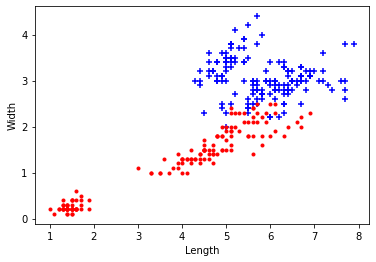

In [14]:
plt.xlabel('Length')
plt.ylabel('Width')
plt.scatter(df_iris['sepal length (cm)'],df_iris['sepal width (cm)'],color='b',marker='+')
plt.scatter(df_iris['petal length (cm)'],df_iris['petal width (cm)'],color='r',marker='.')

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [17]:
s= MinMaxScaler()
s.fit(df_iris[['sepal length (cm)']])
df_iris['sepal length (cm)']= s.transform(df_iris[['sepal length (cm)']])

s.fit(df_iris[['sepal width (cm)']])
df_iris['sepal width (cm)']= s.transform(df_iris[['sepal width (cm)']])

s.fit(df_iris[['petal length (cm)']])
df_iris['petal length (cm)']= s.transform(df_iris[['petal length (cm)']])

s.fit(df_iris[['petal width (cm)']])
df_iris['petal width (cm)']= s.transform(df_iris[['petal width (cm)']])

In [18]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [19]:
k_values=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df_iris,iris.target)
    k_values.append(km.inertia_)
k_values

[41.16611042137328,
 12.12779075053819,
 6.982216473785234,
 5.516933472040375,
 4.5809486401172945,
 3.950764867049353,
 3.4695625108162202,
 3.15449043998872,
 2.8159263637133702]

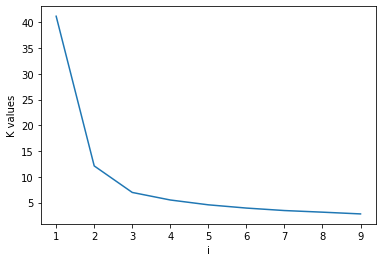

In [20]:
plt.xlabel('i')
plt.ylabel('K values')
plt.plot(range(1,10),k_values)

In [22]:
kmz = KMeans(n_clusters=2)
y_predicted = kmz.fit_predict(df_iris)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
kmz.cluster_centers_

array([[0.545     , 0.36333333, 0.6620339 , 0.65666667],
       [0.19611111, 0.595     , 0.07830508, 0.06083333]])

In [27]:
df_iris['cluster']=y_predicted

In [28]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,0
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


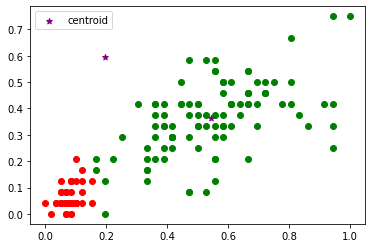

In [29]:
df1 = df_iris[df_iris.cluster==0]
df2 = df_iris[df_iris.cluster==1]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(kmz.cluster_centers_[:,0],kmz.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [30]:
kmz = KMeans(n_clusters=3)
y_predicted = kmz.fit_predict(df_iris)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [31]:
kmz.cluster_centers_

array([[ 1.96111111e-01,  5.95000000e-01,  7.83050847e-02,
         6.08333333e-02,  1.00000000e+00],
       [ 7.07264957e-01,  4.50854701e-01,  7.97044763e-01,
         8.24786325e-01, -1.66533454e-16],
       [ 4.41256831e-01,  3.07377049e-01,  5.75715477e-01,
         5.49180328e-01,  5.55111512e-17]])

In [32]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,0
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


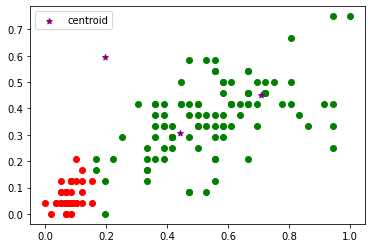

In [38]:
df1 = df_iris[df_iris.cluster==0]
df2 = df_iris[df_iris.cluster==1]
df3 = df_iris[df_iris.cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='blue')
plt.scatter(kmz.cluster_centers_[:,0],kmz.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()